In [19]:
import pandas as pd

df = pd.read_csv('airlines_flights_data.csv')
df.head(10)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [6]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
df.describe(include=['object'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [29]:
business = df[df['class']=='Business']
economy =  df[df['class']=='Economy']

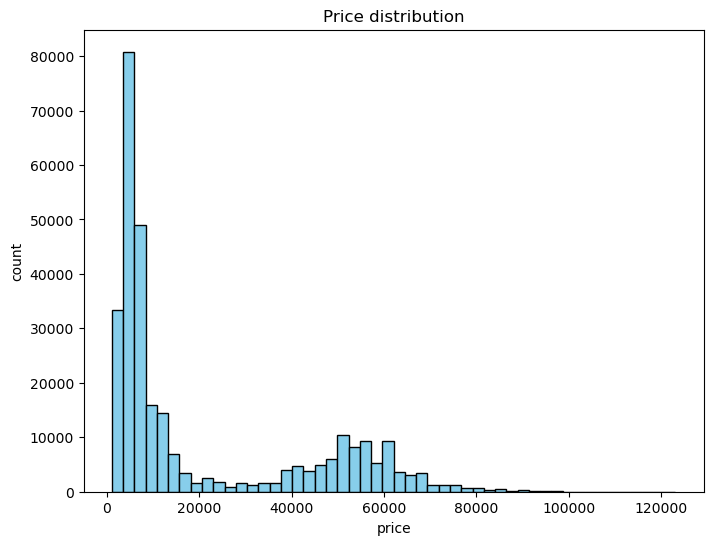

In [40]:
# histograma de alguna variable
plt.figure(figsize=(8,6))
plt.title('Price distribution')
plt.xlabel('price')
plt.ylabel('count')
plt.hist(df['price'],bins=50, color='skyblue',edgecolor='black')
plt.show()

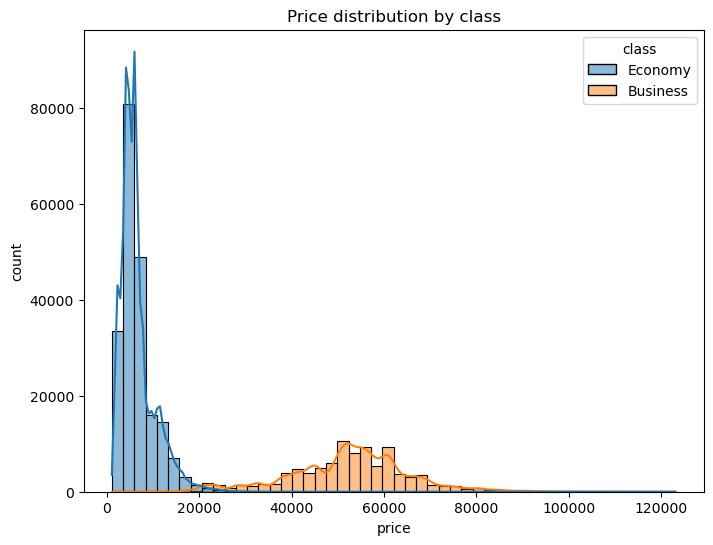

In [42]:
# histograma con seaborn
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='price',bins=50,hue='class',kde='True',alpha=0.5)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Price distribution by class')
plt.show()

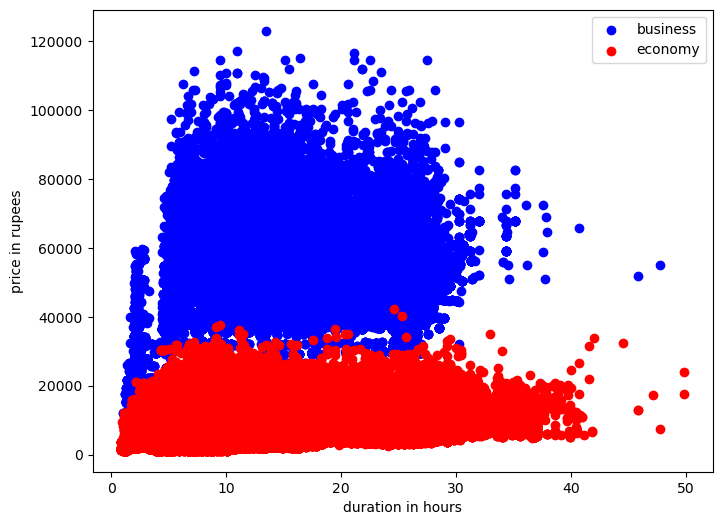

In [34]:
# graficar precio en funcion de la duracion
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlabel('duration in hours')
plt.ylabel('price in rupees')
plt.scatter(business['duration'],business['price'], color='blue', label='business')
plt.scatter(economy['duration'], economy['price'], color='red', label='economy')
plt.legend()
plt.show()

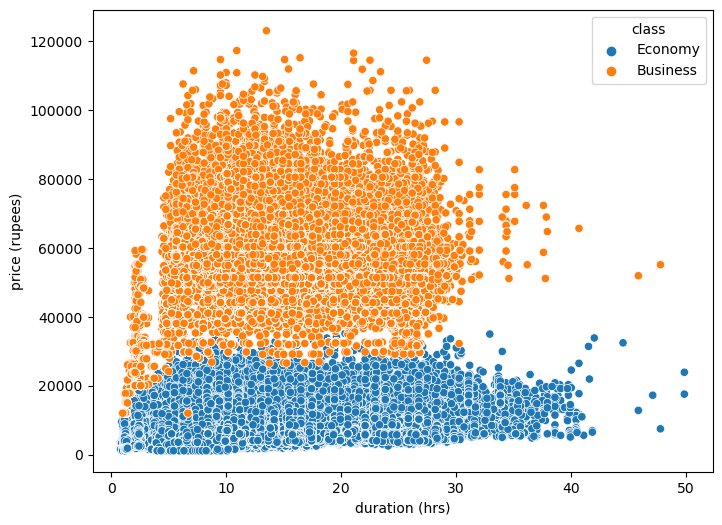

In [41]:
# Graficar tambien con seaborn
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='duration',y='price',hue='class')
plt.xlabel('duration (hrs)')
plt.ylabel('price (rupees)')
plt.show()

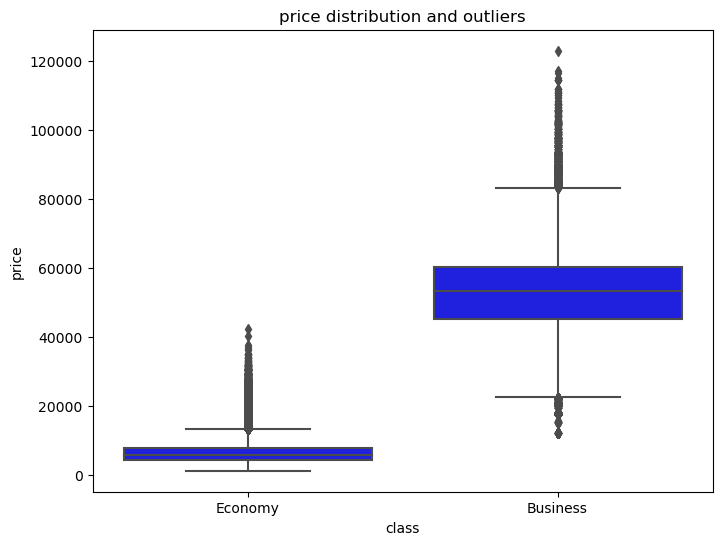

In [44]:
# boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='class',y='price',color='blue')
plt.title('price distribution and outliers')
plt.show()

In [45]:
df.corr(numeric_only=True)

,index,duration,days_left,price
index,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


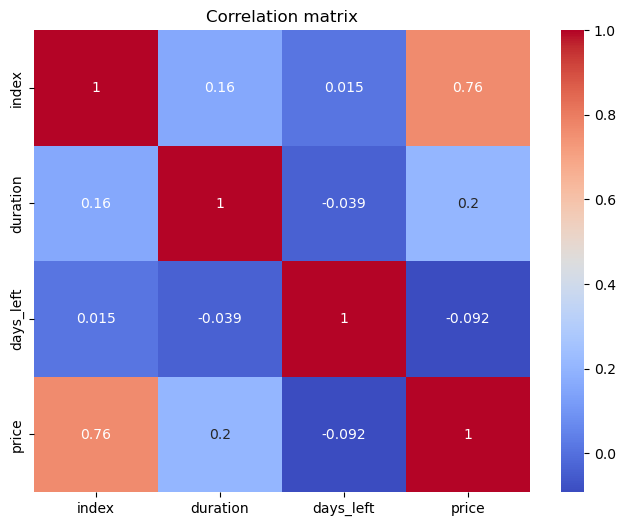

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [48]:
# Significance test
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(business, economy, equal_var=False)
print("p-value:", pvalue)

p-value: 0.0


There is a statistically significant difference in prices for economy and business, as expected

Seems like it is easy to propose a clusterization method for price and duration depending on the class, so we can predict.

/home/jortizvilla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


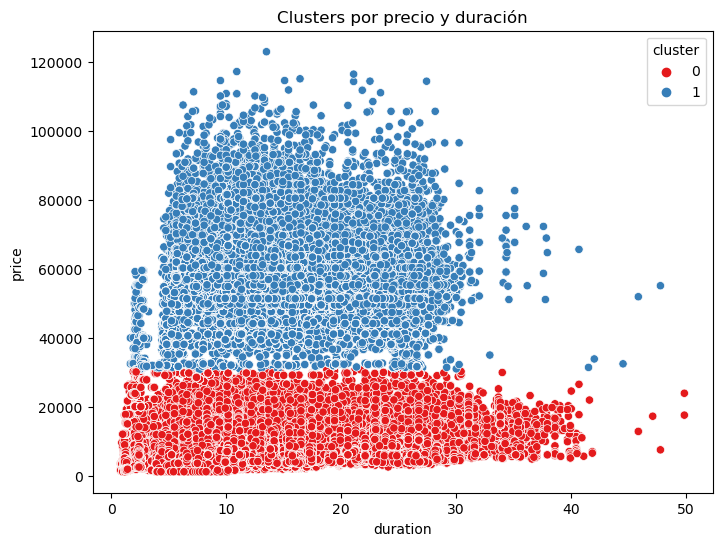

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['duration','price']]

kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x='duration', y='price', data=df, hue='cluster', palette='Set1')
plt.title('Clusters por precio y duración')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Codificar 'class'
le = LabelEncoder()
df['class_num'] = le.fit_transform(df['class'])  # Economy=0, Business=1

X = df[['duration','class_num']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coeficientes:", model.coef_)
print("Intercept:", model.intercept_)
print("Score R2:", model.score(X_test, y_test))


Coeficientes: [   239.72449457 -45453.75855247]
Intercept: 49260.59389438224
Score R2: 0.8853748673559969


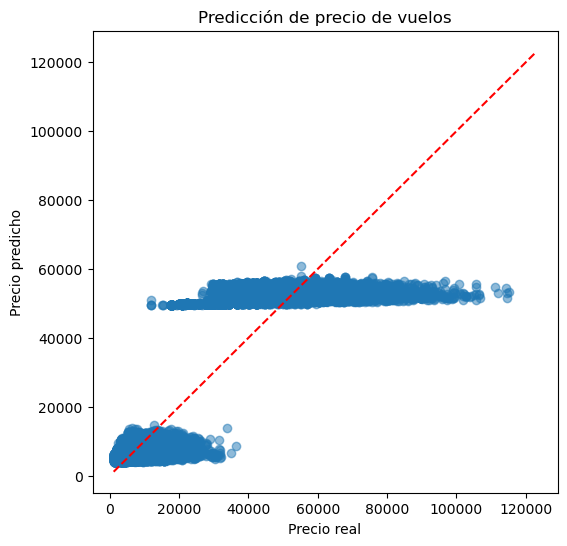

In [51]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicción de precio de vuelos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea ideal
plt.show()


In [52]:
# Ejemplo: vuelo de 2 horas, clase Economy
nuevo = [[2,0]]  # duration=2, class=Economy
prediccion = model.predict(nuevo)
print("Precio estimado:", prediccion[0])

Precio estimado: 49740.04288351942


/home/jortizvilla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Business': 0, 'Economy': 1}

/home/jortizvilla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


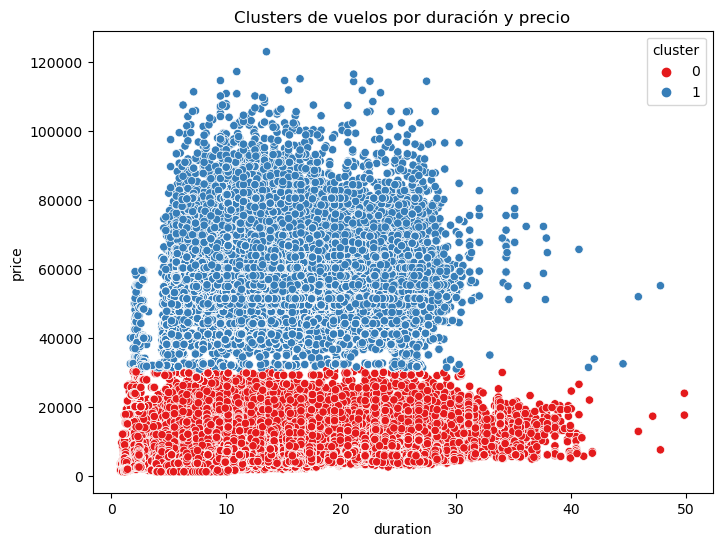

cluster        0      1
class                  
Business    5960  87527
Economy   206610     56


In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables para clustering (sin usar la clase)
X = df[['duration', 'price']]

# Crear modelo K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualizar clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='duration', y='price', hue='cluster', palette='Set1')
plt.title('Clusters de vuelos por duración y precio')
plt.show()

# Comparar clusters con clase real
print(pd.crosstab(df['class'], df['cluster']))


In [55]:
kmeans.fit(X)
# Nuevo vuelo con duración 3 hrs y precio 5000
nuevo_vuelo = [[3, 5000]]

cluster_predicho = kmeans.predict(nuevo_vuelo)
print("El cluster asignado al nuevo vuelo es:", cluster_predicho[0])


El cluster asignado al nuevo vuelo es: 0


/home/jortizvilla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jortizvilla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
